In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import csv
import warnings
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
raw_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
raw_df.head(20)
raw_df.columns


Index(['addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft',
       'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat',
       'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway',
       'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher',
       'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer',
       'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden',
       'has_childrens_playroom', 'rent', 'no_fee', 'description',
       'neighborhood', 'borough', 'unit', 'floornumber', 'line'],
      dtype='object')

# Data Summarize

In [3]:
raw_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.199900e+04,1.200000e+04,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,10723.000000
mean,1.529133e+06,1.657667,1.239500,850.465750,10682.779667,40.727507,-73.956837,2.370093e+06,2.287120e+09,10.266608,...,0.271667,0.170000,0.264083,0.208583,0.073167,0.132083,0.090500,3605.762917,0.490000,6.182738
std,4.301123e+06,1.079771,0.560208,515.773101,593.370964,0.053241,0.043024,1.242919e+06,1.202105e+09,12.019787,...,0.444837,0.375648,0.440862,0.406313,0.260421,0.338595,0.286909,2897.069446,0.499921,7.671545
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.141570,1.000000e+06,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,6.209200e+04,1.000000,1.000000,610.000000,10023.000000,40.693256,-73.986076,1.052139e+06,1.011220e+09,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.495815e+05,2.000000,1.000000,800.000000,11103.000000,40.729028,-73.961700,3.019358e+06,3.006580e+09,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,8.225132e+05,2.000000,1.000000,1000.000000,11218.000000,40.764599,-73.936663,3.326098e+06,3.050580e+09,12.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,1.877210e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.010640e+09,90.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [4]:
raw_df.shape

(12000, 38)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 7236931 to 7422694
Data columns (total 38 columns):
addr_unit                 11909 non-null object
building_id               12000 non-null int64
bedrooms                  12000 non-null int64
bathrooms                 12000 non-null float64
size_sqft                 12000 non-null float64
created_at                12000 non-null object
addr_street               12000 non-null object
addr_city                 12000 non-null object
addr_zip                  12000 non-null int64
addr_lat                  12000 non-null float64
addr_lon                  12000 non-null float64
bin                       11999 non-null float64
bbl                       12000 non-null int64
floor_count               12000 non-null float64
year_built                11597 non-null float64
min_to_subway             11874 non-null float64
has_doorman               12000 non-null int64
has_elevator              12000 non-null int64
has_fireplace    

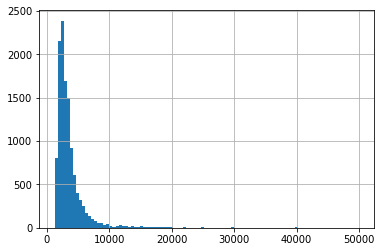

In [6]:
raw_df['rent'].hist(bins=100)

### Seperate all features into continuous, categorical and binary features.

For those none relatived features, we have excluded them from the features grouping: 
- addr_unit: no relationship
- building_id: no relationship
- addr_lat: hard to analyze latitude
- addr_lon: hard to analyze longtitude
- bin: no relationship
- bbl: no relationshio
- description: hard to build a NLP model
- unit: no relationship


In [7]:
continuous_features =['bathrooms','bedrooms','size_sqft','floor_count','year_built','min_to_subway','floornumber' ]
caterigal_features =['addr_street','addr_city','addr_zip','neighborhood','borough','line' ]
binary_features = ['has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher','is_furnished', 'has_gym', 'allows_pets', 
                   'has_washer_dryer','has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden',
                   'has_childrens_playroom', 'no_fee', ]




In [8]:
unique_count = [] 
for feature in raw_df.columns:
  unique_count.append(raw_df[feature].nunique())
count_df = pd.DataFrame({'Feature':raw_df.columns,'unique count': unique_count})
count_df

,Feature,unique count
0,addr_unit,2192
1,building_id,7127
2,bedrooms,9
3,bathrooms,10
4,size_sqft,1256
5,created_at,11708
6,addr_street,7122
7,addr_city,37
8,addr_zip,149
9,addr_lat,6517


### use pair coorelation for continuous features

In [9]:
continuous_df = raw_df[continuous_features+['rent']]
continuous_df.corr()['rent'][:-1]

bathrooms        0.611987
bedrooms         0.353337
size_sqft        0.649984
floor_count      0.253517
year_built      -0.001037
min_to_subway    0.000010
floornumber      0.267151
Name: rent, dtype: float64

### Create a scatterplot of continuous features.  

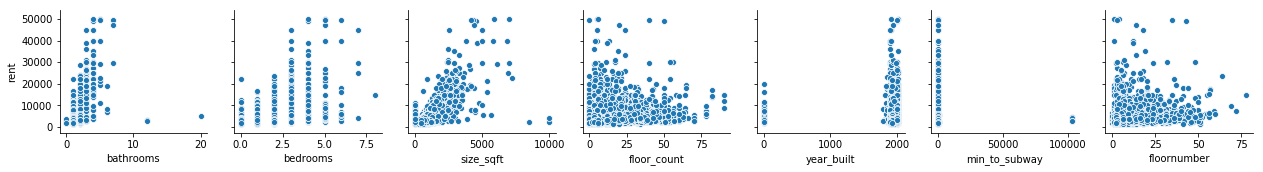

In [10]:
sns.pairplot(data = raw_df,  y_vars=['rent'],x_vars=continuous_features)


### Check coorelation for binary features



In [11]:
raw_df[binary_features+['rent']].corr()['rent'][:-1]
coor_results= []

for feature in binary_features:
  df = raw_df.groupby([feature]).aggregate(['mean'])['rent']
  df[feature]= df.index
  coor_results.append(df.corr().iloc[0][1])
coor_df = pd.DataFrame({'Coorelation': coor_results,'Feature':binary_features})
coor_df

,Coorelation,Feature
0,1.0,has_doorman
1,1.0,has_elevator
2,1.0,has_fireplace
3,1.0,has_dishwasher
4,1.0,is_furnished
5,1.0,has_gym
6,1.0,allows_pets
7,1.0,has_washer_dryer
8,1.0,has_garage
9,1.0,has_roofdeck


As we can see in the correlation table, all binrary features highly affected the rents. When we build the models, we should include all binary features.

### Initialize the external dataset 

In [39]:
raw_income_data=pd.read_csv('https://www.irs.gov/pub/irs-soi/17zpallagi.csv', index_col=0)
raw_income_data.columns

Index(['STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'ELF',
       'CPREP', 'PREP',
       ...
       'N85300', 'A85300', 'N11901', 'A11901', 'N11900', 'A11900', 'N11902',
       'A11902', 'N12000', 'A12000'],
      dtype='object', length=152)

In [40]:
raw_income_data.describe()

,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
count,166537.000000,166537.000000,1.665370e+05,1.665370e+05,1.665370e+05,166537.000000,1.665370e+05,166537.000000,1.665370e+05,1.665370e+05,...,166537.000000,1.665370e+05,166537.000000,1.665370e+05,1.665370e+05,1.665370e+05,1.665370e+05,1.665370e+05,166537.000000,1.665370e+05
mean,48870.221668,3.499883,1.797506e+03,8.568076e+02,6.466075e+02,257.395354,1.595375e+03,109.165711,9.565737e+02,1.115313e+03,...,52.247849,2.652260e+02,366.565508,2.075837e+03,1.385102e+03,4.864975e+03,1.349381e+03,3.932834e+03,43.103875,8.790301e+02
std,27140.457939,1.707903,3.682065e+04,2.157115e+04,1.180901e+04,6579.521856,3.234179e+04,2546.536828,1.996698e+04,2.347348e+04,...,2663.659358,1.535593e+04,6891.242958,6.608186e+04,2.947749e+04,1.012458e+05,2.909491e+04,7.693938e+04,947.324343,4.399491e+04
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,27030.000000,2.000000,7.000000e+01,0.000000e+00,4.000000e+01,0.000000,6.000000e+01,0.000000,4.000000e+01,4.000000e+01,...,0.000000,0.000000e+00,20.000000,2.100000e+01,5.000000e+01,1.580000e+02,4.000000e+01,1.410000e+02,0.000000,0.000000e+00
50%,48876.000000,3.000000,2.500000e+02,7.000000e+01,1.100000e+02,20.000000,2.200000e+02,0.000000,1.500000e+02,1.400000e+02,...,0.000000,0.000000e+00,60.000000,1.550000e+02,1.800000e+02,6.220000e+02,1.700000e+02,5.480000e+02,0.000000,0.000000e+00
75%,70601.000000,5.000000,1.020000e+03,3.400000e+02,3.800000e+02,90.000000,9.100000e+02,60.000000,5.600000e+02,5.900000e+02,...,0.000000,0.000000e+00,220.000000,6.870000e+02,7.400000e+02,2.484000e+03,7.100000e+02,2.207000e+03,30.000000,6.400000e+01
max,99999.000000,6.000000,5.824360e+06,4.130490e+06,1.757700e+06,982390.000000,4.980210e+06,475240.000000,3.387570e+06,3.233490e+06,...,763140.000000,4.031847e+06,890950.000000,1.750126e+07,4.598480e+06,1.667374e+07,4.561540e+06,9.443931e+06,186110.000000,1.056186e+07


In [41]:
raw_income_data.head(10)

,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
STATEFIPS,,,,,,,,,,,,,,,,,,,,,
1,AL,0,1,802640.0,474470.0,99850.0,216600.0,717050.0,44090.0,426090.0,...,0.0,0.0,64680.0,53602.0,700940.0,1803125.0,698100.0,1796343.0,2860.0,4917.0
1,AL,0,2,499070.0,218590.0,137460.0,129760.0,448190.0,26230.0,269560.0,...,0.0,0.0,77660.0,118725.0,419640.0,1175607.0,416180.0,1165352.0,4250.0,8894.0
1,AL,0,3,268590.0,89780.0,134440.0,38280.0,241060.0,14160.0,156410.0,...,0.0,0.0,67820.0,156752.0,201030.0,560461.0,197060.0,547812.0,5440.0,13482.0
1,AL,0,4,170880.0,32180.0,124070.0,11660.0,154120.0,7980.0,101650.0,...,0.0,0.0,48440.0,141721.0,121930.0,396526.0,118460.0,383588.0,3160.0,12369.0
1,AL,0,5,229870.0,22810.0,196990.0,5540.0,208380.0,11120.0,136470.0,...,50.0,19.0,91100.0,465160.0,138250.0,588068.0,130970.0,529001.0,8430.0,55564.0
1,AL,0,6,62610.0,3620.0,55650.0,460.0,57140.0,2460.0,46600.0,...,31840.0,112601.0,33210.0,906244.0,26820.0,621875.0,18250.0,219752.0,8100.0,352479.0
1,AL,35004,1,1500.0,970.0,220.0,290.0,1340.0,80.0,670.0,...,0.0,0.0,120.0,126.0,1300.0,2800.0,1290.0,2768.0,0.0,0.0
1,AL,35004,2,1340.0,670.0,350.0,280.0,1210.0,80.0,590.0,...,0.0,0.0,210.0,266.0,1130.0,2892.0,1120.0,2880.0,0.0,0.0
1,AL,35004,3,920.0,330.0,430.0,140.0,850.0,40.0,420.0,...,0.0,0.0,190.0,377.0,730.0,2012.0,720.0,1985.0,40.0,46.0


### About the dataset 
This dataset comes from the IRS website's 2017 ZIP Code Data (SOI) about Individual Income Tax Statistics.
According to the documentation's overview,the Statistics of Income (SOI) Division’s ZIP code data is tabulated using individual income tax returns (Forms 1040) filed with the Internal Revenue Service (IRS) during the 12-month period, January 1, 2018 to December 31, 2018.
The original dataset contains many income and Tax Items, we only keep the ones that are relevant: 
- STATEFIPS:The State Federal Information Processing System (FIPS) code
- STATE: The State associated with the ZIP code
- ZIPCODE: 5-digit Zip code
- agi_stub: Size of adjusted gross income
- N1: Total number of returns
- A02650: Number of returns with total income

Our goal is to find the average income of each zipcode.

### Narrow down the dataframe and rename columns

In [61]:
raw_income_data = raw_income_data.loc[raw_income_data['STATE']=='NY']
raw_income_data.rename(columns = {'N1':'total_returns', 'A02650':'total_income'}, inplace = True) 
raw_income_data = raw_income_data[['STATE','zipcode','agi_stub','total_returns', 'total_income']]
raw_income_data = raw_income_data.loc[raw_income_data['zipcode']<99999]
raw_income_data = raw_income_data.loc[raw_income_data['zipcode']>0]

raw_income_data.head(12)

,STATE,zipcode,agi_stub,total_returns,total_income
STATEFIPS,,,,,
36,NY,10001,1,3640.0,44319.0
36,NY,10001,2,2540.0,96947.0
36,NY,10001,3,2020.0,127601.0
36,NY,10001,4,1480.0,129884.0
36,NY,10001,5,2920.0,417092.0
36,NY,10001,6,2740.0,2004568.0
36,NY,10002,1,20160.0,246980.0
36,NY,10002,2,8460.0,309369.0
36,NY,10002,3,5030.0,312588.0


### Function to calculate the average income by zip code
Each zip code has 6 different sizes of adjusted gross income which means we have 6 different number of total returns and total income for one zip code.
By using the np.where and sum function, we can obtain the sum of income and sum of returns for each zip code. The income of the original dataset was in thousands of dollar so we need to multiply the sum of income by 1000 and then find the average. Since some zip code was not in the original set, we ingore those average that is NaN and only write the meaningful averages to csv file for future use.

In [48]:
def calculate_avg_income():
    with open('data/17ny.csv', mode='w') as avg_file:
        thewriter = csv.writer(avg_file)
        thewriter.writerow(['addr_zip','addr_zip_average_income'])
        for zipcode in range(10001, 14906):
            current_sum=np.where(raw_income_data['zipcode']==zipcode, raw_income_data['total_income'],0).sum()
            current_returns=np.where(raw_income_data['zipcode']==zipcode, raw_income_data['total_returns'],0).sum()  
            avg_income=(current_sum*1000)/current_returns
            if(avg_income>0):
                thewriter.writerow([zipcode,avg_income])
    

### Calculate the average

In [ ]:
warnings.filterwarnings('ignore')
calculate_avg_income()

### Read the averages file 

In [56]:
average_income=pd.read_csv("data/17ny.csv")
average_income.head(5)

,addr_zip,addr_zip_average_income
0,10001,183859.908735
1,10002,59669.401750
2,10003,306277.962003
3,10004,385265.306122
4,10005,391201.520270


### Merge the raw dataset and the income dataset by addr_zip

In [57]:
raw_df=raw_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')
raw_df.head(5)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,addr_zip_average_income_x,addr_zip_average_income_y
rental_id,,,,,,,,,,,,,,,,,,,,,
7236931,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,40.646982,...,3925,1,MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM...,Flatbush,Brooklyn,22A,NaN,NaN,43226.418306,43226.418306
7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,40.716599,...,3350,0,Want to live in the hottest neighborhood in to...,Tribeca,Manhattan,406,4.0,06,490137.516513,490137.516513
7139224,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,40.755402,...,11500,0,"High floor totally renovated 3 bedrooms, 3 bat...",Midtown East,Manhattan,18A,18.0,A,601535.887296,601535.887296
7364827,#23E,42076,1,1.0,827.0,2018-07-13 16:06:55,70 WEST 37TH STREET,New York,10018,40.751301,...,3772,1,**SHORT TERM LEASES AVAILABLE**\n\n****Photogr...,Midtown South,Manhattan,23E,23.0,E,359070.571010,359070.571010
7242151,#3B,319156,3,1.0,1200.0,2018-06-05 16:35:40,43 MAC DONOUGH STREET,Brooklyn,11216,40.681132,...,2595,1,This is a Huuge 3 bedroom apt. located in a pr...,Bedford-Stuyvesant,Brooklyn,3B,3.0,B,55622.606651,55622.606651


### Merged Data Summarize

In [58]:
raw_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber,addr_zip_average_income_x,addr_zip_average_income_y
count,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.199900e+04,1.200000e+04,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,10723.000000,11840.000000,11840.000000
mean,1.529133e+06,1.657667,1.239500,850.465750,10682.779667,40.727507,-73.956837,2.370093e+06,2.287120e+09,10.266608,...,0.264083,0.208583,0.073167,0.132083,0.090500,3605.762917,0.490000,6.182738,175596.112022,175596.112022
std,4.301123e+06,1.079771,0.560208,515.773101,593.370964,0.053241,0.043024,1.242919e+06,1.202105e+09,12.019787,...,0.440862,0.406313,0.260421,0.338595,0.286909,2897.069446,0.499921,7.671545,159425.199232,159425.199232
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.141570,1.000000e+06,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000,27581.542056,27581.542056
25%,6.209200e+04,1.000000,1.000000,610.000000,10023.000000,40.693256,-73.986076,1.052139e+06,1.011220e+09,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000,57996.356663,57996.356663
50%,2.495815e+05,2.000000,1.000000,800.000000,11103.000000,40.729028,-73.961700,3.019358e+06,3.006580e+09,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000,87208.045274,87208.045274
75%,8.225132e+05,2.000000,1.000000,1000.000000,11218.000000,40.764599,-73.936663,3.326098e+06,3.050580e+09,12.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000,283732.621359,283732.621359
max,1.877210e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.010640e+09,90.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000,693379.945055,693379.945055


In [59]:
raw_df.shape

(12000, 40)

In [60]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 7236931 to 7422694
Data columns (total 40 columns):
addr_unit                    11909 non-null object
building_id                  12000 non-null int64
bedrooms                     12000 non-null int64
bathrooms                    12000 non-null float64
size_sqft                    12000 non-null float64
created_at                   12000 non-null object
addr_street                  12000 non-null object
addr_city                    12000 non-null object
addr_zip                     12000 non-null int64
addr_lat                     12000 non-null float64
addr_lon                     12000 non-null float64
bin                          11999 non-null float64
bbl                          12000 non-null int64
floor_count                  12000 non-null float64
year_built                   11597 non-null float64
min_to_subway                11874 non-null float64
has_doorman                  12000 non-null int64
has_elevator 